In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import pandas as pd

data = pd.read_csv('./Dataset/cancer_mama.csv')

print("Dataset de cancer de mama:\n\n {}".format(data))

Dataset de cancer de mama:

        842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    20

In [2]:
headerList = ['ID', 'Result', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD']

data.columns = headerList

print("Definicion del encabezado para las columnas del dataset:\n\n {}".format(data))

Definicion del encabezado para las columnas del dataset:

            ID Result      A      B       C       D        E        F        G  \
0      842517      M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903      M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301      M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402      M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786      M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ...    ...    ...    ...     ...     ...      ...      ...      ...   
563    926424      M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682      M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954      M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241      M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751      B   7.76  24.54   47.92   181.0

In [3]:
del data['ID']

data['Result'] = data['Result'].replace(['M', 'B'], [1, 0])

print("Eliminacion de columnas sin relevancia para el caso de estudio y conversion de atributos no medibles u operables a valores enteros:\n\n {}".format(data))

Eliminacion de columnas sin relevancia para el caso de estudio y conversion de atributos no medibles u operables a valores enteros:

      Result      A      B       C       D        E        F        G        H  \
0         1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
1         1  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
2         1  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
3         1  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
4         1  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089   
..      ...    ...    ...     ...     ...      ...      ...      ...      ...   
563       1  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890   
564       1  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791   
565       1  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302   
566       1  20.60  29.33  140.10  1265.0  0.11780  0.27

Implementación de un diagrama de cajas para la visualización y mejor analisis del dataset:



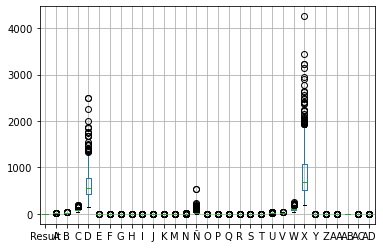

In [4]:
data.boxplot( column = ['Result', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD'])

print("Implementación de un diagrama de cajas para la visualización y mejor analisis del dataset:\n")

Implementación de un diagrama de cajas para la visualización y mejor análisis del dataset sin datos atípicos:



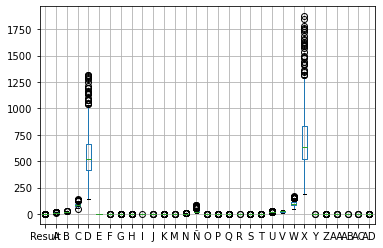

In [5]:
dataCopy = data

maxlimit = 0
minlimit = 0

for i in range(2, len(headerList)):
    
    q75 = np.quantile(data[headerList[i]],.75)
    q25 = np.quantile(data[headerList[i]],.25)
    intr_qr = q75 - q25
    
    maxlimit = q75 + (1.5 * intr_qr)
    minlimit = q25 - (1.5 * intr_qr)
    
    dataCopy = dataCopy[dataCopy[headerList[i]] < maxlimit]
    dataCopy = dataCopy[dataCopy[headerList[i]] > minlimit]

data = dataCopy    

data.boxplot( column = ['Result', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD'])

print("Implementación de un diagrama de cajas para la visualización y mejor análisis del dataset sin datos atípicos:\n")

In [6]:
print("Matriz de correlación para conjunto de datos:\n\n{}".format(data.corr()))

Matriz de correlación para conjunto de datos:

          Result         A         B         C         D         E         F  \
Result  1.000000  0.680438  0.389751  0.695617  0.697752  0.270941  0.515286   
A       0.680438  1.000000  0.281875  0.998118  0.992040  0.054485  0.443268   
B       0.389751  0.281875  1.000000  0.286830  0.289779 -0.046049  0.180578   
C       0.695617  0.998118  0.286830  1.000000  0.990235  0.092502  0.493730   
D       0.697752  0.992040  0.289779  0.990235  1.000000  0.057452  0.429607   
E       0.270941  0.054485 -0.046049  0.092502  0.057452  1.000000  0.676284   
F       0.515286  0.443268  0.180578  0.493730  0.429607  0.676284  1.000000   
G       0.711026  0.658477  0.295082  0.696614  0.665299  0.464362  0.837560   
H       0.752618  0.756046  0.239135  0.786315  0.758590  0.523037  0.805168   
I       0.242816  0.074692  0.052130  0.101557  0.076954  0.493524  0.471631   
J      -0.084990 -0.435614 -0.112367 -0.393039 -0.422180  0.618208  0.478

In [7]:
x = data[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'M', 'N', 'Ñ', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD']]
y = data[['Result']]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)

print("Total de datos de entrenamiento: {}".format(len(X_train)))

clf = MLPClassifier(max_iter = 200).fit(X_train, y_train)

print("Precisión de la red neuronal: {}".format(clf.score(X_test, y_test)))

Total de datos de entrenamiento: 238


/home/cristian/Anaconda/envs/PyCristian/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precisión de la red neuronal: 0.9056603773584906


/home/cristian/Anaconda/envs/PyCristian/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
